In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cheating-detection-offline/WIN_20250118_13_30_20_Pro.mp4
/kaggle/input/cheating-detection-offline/WIN_20250118_13_33_04_Pro.mp4
/kaggle/input/cheating-detection-offline/WIN_20250118_13_38_45_Pro.mp4
/kaggle/input/cheating-detection-offline/WIN_20250118_13_31_35_Pro.mp4
/kaggle/input/cheating-detection-offline/WIN_20250118_13_21_54_Pro.mp4
/kaggle/input/cheating-detection-offline/WIN_20250118_13_33_41_Pro.mp4
/kaggle/input/cheating-detection-offline/WIN_20250118_13_35_37_Pro.mp4
/kaggle/input/cheating-detection-offline/WIN_20250118_13_27_45_Pro.mp4
/kaggle/input/cheating-detection-offline/WIN_20250118_13_36_58_Pro.mp4
/kaggle/input/cheating-detection-offline/WIN_20250118_13_31_59_Pro.mp4
/kaggle/input/cheating-detection-offline/WIN_20250118_13_40_53_Pro.mp4
/kaggle/input/cheating-detection-offline/WIN_20250118_13_24_39_Pro.mp4
/kaggle/input/cheating-detection-offline/WIN_20250118_13_29_14_Pro.mp4
/kaggle/input/cheating-detection-offline/WIN_20250118_13_37_57_Pro.mp4
/kaggl

In [4]:
proctoring_dataset="/kaggle/input/proctoring1"

# Installing libraries

In [1]:
! pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.7/914.7 kB 30.6 MB/s eta 0:00:00


In [1]:
import torch
if torch.cuda.is_available():
    print("yay")

yay


In [4]:
! pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.7/914.7 kB 20.5 MB/s eta 0:00:0000:01


In [5]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
model=YOLO("yolov8s.pt").to("cuda")
model.train(data="/kaggle/input/proctoring1/data.yaml",epochs=50, imgsz=640, batch=8, device="cuda")

100%|██████████| 21.5M/21.5M [00:00<00:00, 108MB/s] 


Ultralytics 8.3.74 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/input/proctoring1/data.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

100%|██████████| 755k/755k [00:00<00:00, 25.8MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 97.9MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/proctoring1/train/labels... 466 images, 84 backgrounds, 0 corrupt: 100%|██████████| 466/466 [00:01<00:00, 373.59it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/proctoring1/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.3 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/input/proctoring1/valid/labels... 24 images, 4 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<00:00, 300.56it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/proctoring1/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.41G      1.954       2.74      1.704          6        640: 100%|██████████| 59/59 [00:11<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         24         99      0.438      0.559      0.447      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.52G      1.752      1.797      1.535          4        640: 100%|██████████| 59/59 [00:10<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.12it/s]

                   all         24         99      0.296      0.718      0.358      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.34G      1.799      1.718      1.587          6        640: 100%|██████████| 59/59 [00:10<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.04it/s]

                   all         24         99      0.452        0.6      0.499        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.39G       1.76      1.745       1.57          9        640: 100%|██████████| 59/59 [00:10<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.88it/s]

                   all         24         99      0.298      0.921      0.503       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.34G      1.767      1.625      1.538          3        640: 100%|██████████| 59/59 [00:10<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.28it/s]

                   all         24         99      0.245      0.638      0.316       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.39G      1.749      1.632      1.547          1        640: 100%|██████████| 59/59 [00:10<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.81it/s]

                   all         24         99      0.356      0.939      0.643      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.34G       1.68      1.554      1.515          2        640: 100%|██████████| 59/59 [00:10<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.27it/s]

                   all         24         99      0.271      0.619      0.347      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.45G      1.671      1.407      1.494         12        640: 100%|██████████| 59/59 [00:10<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.26it/s]

                   all         24         99       0.36       0.49      0.355      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.46G       1.63      1.397      1.479          2        640: 100%|██████████| 59/59 [00:10<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.10it/s]

                   all         24         99       0.29      0.415      0.369      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.38G      1.639      1.349      1.483          9        640: 100%|██████████| 59/59 [00:10<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.26it/s]

                   all         24         99      0.269      0.543      0.353      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.52G       1.57      1.344      1.438          8        640: 100%|██████████| 59/59 [00:10<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.53it/s]

                   all         24         99      0.323      0.482      0.439      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.52G      1.629      1.314       1.48          5        640: 100%|██████████| 59/59 [00:10<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.52it/s]

                   all         24         99      0.381      0.751      0.465      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.34G      1.642       1.34      1.476          1        640: 100%|██████████| 59/59 [00:10<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.49it/s]

                   all         24         99      0.324      0.482      0.402      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.52G      1.617      1.324      1.463         17        640: 100%|██████████| 59/59 [00:10<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.36it/s]

                   all         24         99       0.38      0.808      0.567      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.39G      1.576      1.248      1.454         16        640: 100%|██████████| 59/59 [00:10<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.45it/s]

                   all         24         99      0.601      0.526       0.58       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.44G      1.525      1.224      1.422          3        640: 100%|██████████| 59/59 [00:10<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.32it/s]

                   all         24         99      0.295      0.514      0.449      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.52G      1.522       1.22      1.427          5        640: 100%|██████████| 59/59 [00:10<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.12it/s]

                   all         24         99      0.335      0.494      0.452      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.51G      1.548       1.25       1.43          7        640: 100%|██████████| 59/59 [00:10<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.27it/s]

                   all         24         99      0.317      0.476      0.424      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.47G      1.522      1.139       1.39         13        640: 100%|██████████| 59/59 [00:10<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.38it/s]

                   all         24         99      0.814      0.482      0.424      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.46G      1.486      1.211       1.41         15        640: 100%|██████████| 59/59 [00:10<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.25it/s]

                   all         24         99        0.8      0.488      0.344      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.44G        1.5      1.178      1.397          9        640: 100%|██████████| 59/59 [00:10<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.57it/s]

                   all         24         99      0.464      0.576      0.428      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.44G      1.513      1.166      1.426         10        640: 100%|██████████| 59/59 [00:10<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.21it/s]

                   all         24         99      0.354       0.57      0.375      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.39G      1.462      1.159      1.398          5        640: 100%|██████████| 59/59 [00:10<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.62it/s]

                   all         24         99      0.363      0.613      0.374      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.45G      1.476       1.13      1.386          8        640: 100%|██████████| 59/59 [00:10<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.09it/s]

                   all         24         99      0.642       0.55       0.53      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.34G      1.448      1.109       1.38          4        640: 100%|██████████| 59/59 [00:10<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.65it/s]

                   all         24         99      0.431      0.602      0.467      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.38G      1.446      1.121      1.384         12        640: 100%|██████████| 59/59 [00:10<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.36it/s]

                   all         24         99      0.317      0.476      0.416      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.39G       1.41      1.098      1.384          5        640: 100%|██████████| 59/59 [00:10<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.08it/s]

                   all         24         99      0.858      0.464      0.446      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.44G      1.375      1.074      1.337          3        640: 100%|██████████| 59/59 [00:10<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.97it/s]

                   all         24         99      0.862      0.482      0.452      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.52G      1.419      1.143      1.368          4        640: 100%|██████████| 59/59 [00:10<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.25it/s]

                   all         24         99       0.83      0.482       0.42      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.47G      1.388       1.12       1.34          0        640: 100%|██████████| 59/59 [00:10<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.40it/s]

                   all         24         99      0.358      0.509      0.466      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.39G      1.402      1.062      1.364          1        640: 100%|██████████| 59/59 [00:10<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.59it/s]

                   all         24         99      0.481      0.607      0.481      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       2.5G       1.42      1.077      1.343          7        640: 100%|██████████| 59/59 [00:10<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.35it/s]

                   all         24         99      0.573      0.544      0.494      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.47G      1.394      1.031      1.343          7        640: 100%|██████████| 59/59 [00:10<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.00it/s]

                   all         24         99       0.82      0.488      0.424      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.33G      1.355      1.022      1.313          6        640: 100%|██████████| 59/59 [00:10<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.88it/s]

                   all         24         99      0.845      0.488      0.398       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.45G      1.294     0.9653      1.269         15        640: 100%|██████████| 59/59 [00:10<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.33it/s]

                   all         24         99      0.339      0.482      0.401      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.39G      1.312      0.992      1.307         14        640: 100%|██████████| 59/59 [00:10<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.71it/s]

                   all         24         99      0.332      0.513      0.396      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.35G      1.319     0.9645      1.285         14        640: 100%|██████████| 59/59 [00:10<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.82it/s]

                   all         24         99      0.357      0.544      0.402      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.47G      1.304     0.9523      1.303          3        640: 100%|██████████| 59/59 [00:10<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.37it/s]

                   all         24         99      0.823      0.482      0.499      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.48G      1.313     0.9295      1.298          5        640: 100%|██████████| 59/59 [00:10<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.71it/s]

                   all         24         99      0.821      0.484      0.415      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.44G       1.31     0.9319      1.269          7        640: 100%|██████████| 59/59 [00:10<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.26it/s]

                   all         24         99      0.324      0.494      0.461      0.211


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.52G      1.294     0.8949      1.346          4        640: 100%|██████████| 59/59 [00:10<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.29it/s]

                   all         24         99      0.625      0.586      0.473      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.37G      1.259     0.8682      1.307          4        640: 100%|██████████| 59/59 [00:10<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.91it/s]

                   all         24         99      0.807      0.476      0.392      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.52G      1.266     0.8391      1.327          5        640: 100%|██████████| 59/59 [00:10<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.51it/s]

                   all         24         99      0.844      0.488      0.411      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.39G      1.242     0.8235      1.314          5        640: 100%|██████████| 59/59 [00:10<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.19it/s]

                   all         24         99      0.343      0.494      0.421      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.34G       1.23     0.8284      1.308          9        640: 100%|██████████| 59/59 [00:10<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.88it/s]

                   all         24         99      0.836      0.481      0.379       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.39G      1.208     0.8179        1.3          4        640: 100%|██████████| 59/59 [00:10<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.36it/s]

                   all         24         99       0.31      0.482      0.422      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.39G      1.215     0.8147       1.29          3        640: 100%|██████████| 59/59 [00:10<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.34it/s]

                   all         24         99      0.843      0.475      0.389      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.37G      1.196     0.8024       1.28          2        640: 100%|██████████| 59/59 [00:10<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.55it/s]

                   all         24         99      0.323      0.483      0.382      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.47G      1.176      0.771      1.273          4        640: 100%|██████████| 59/59 [00:10<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.64it/s]

                   all         24         99      0.824      0.482      0.416      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.32G      1.175     0.7887      1.266          9        640: 100%|██████████| 59/59 [00:10<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.74it/s]

                   all         24         99      0.845      0.482      0.442      0.194



50 epochs completed in 0.160 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.74 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.02it/s]


                   all         24         99        0.6      0.526       0.58       0.29
              cheating         13         16      0.473      0.438       0.45      0.274
          non-cheating         18         83      0.728      0.614      0.711      0.307


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 5.9ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79c009242f50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [7]:
metrics = model.val()
print(metrics)


Ultralytics 8.3.74 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /kaggle/input/proctoring1/valid/labels... 24 images, 4 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<00:00, 694.69it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/proctoring1/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.17it/s]


                   all         24         99        0.6      0.526       0.58       0.29
              cheating         13         16      0.472      0.438      0.449      0.272
          non-cheating         18         83      0.727      0.614      0.711      0.307


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 5.1ms preprocess, 8.6ms inference, 0.0ms loss, 5.8ms postprocess per image
Results saved to runs/detect/train2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79c03e1e6380>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,    


image 1/1 /kaggle/input/proctoring1/test/images/WIN_20250118_13_38_45_Pro_mp4-0011_jpg.rf.9d8720ddae03dbb0bb49ce8275d4f185.jpg: 640x640 1 cheating, 1 non-cheating, 9.4ms
Speed: 2.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


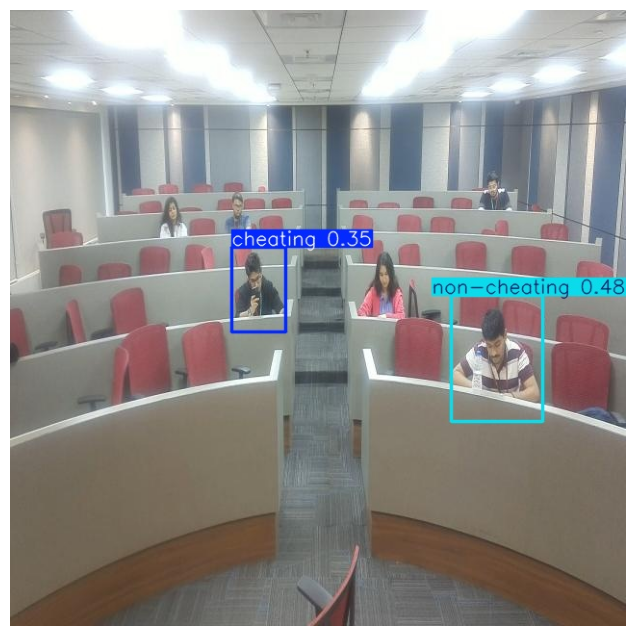

In [12]:
import cv2
import matplotlib.pyplot as plt

img_path = "/kaggle/input/proctoring1/test/images/WIN_20250118_13_38_45_Pro_mp4-0011_jpg.rf.9d8720ddae03dbb0bb49ce8275d4f185.jpg"

results = model(img_path)
result = results[0]  

result.save("/kaggle/working/output.jpg")
img = cv2.imread("/kaggle/working/output.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis("off")
plt.show()


In [24]:
from ultralytics import YOLO

# Load trained model
model = YOLO("runs/detect/train/weights/best.pt")  # Update path if needed

# Run validation on the test set
metrics = model.val(data="/kaggle/input/proctoring1/test/dataset.yaml")  # Update path

# Print results
print(metrics)

Ultralytics 8.3.74 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


FileNotFoundError: '/kaggle/input/proctoring1/test/dataset.yaml' does not exist

In [17]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

from glob import glob

import IPython.display as ipd
from tqdm import tqdm

import subprocess

plt.style.use('ggplot')

In [18]:
ipd.Video('/kaggle/input/cheating-detection-offline/WIN_20250118_13_31_59_Pro.mp4', width=700)

In [20]:
import cv2

video_path = '/kaggle/input/cheating-detection-offline/WIN_20250118_13_21_54_Pro.mp4'
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Error: Could not open video.")
else:
    print("Video opened successfully!")

cap.release()


Video opened successfully!


In [22]:
import cv2
video_path = '/kaggle/input/cheating-detection-offline/WIN_20250118_13_21_54_Pro.mp4'
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Error: Could not open video.")
else:
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)

    print(f'Height: {height}, Width: {width}')
cap.release()


Height: 1080.0, Width: 1920.0


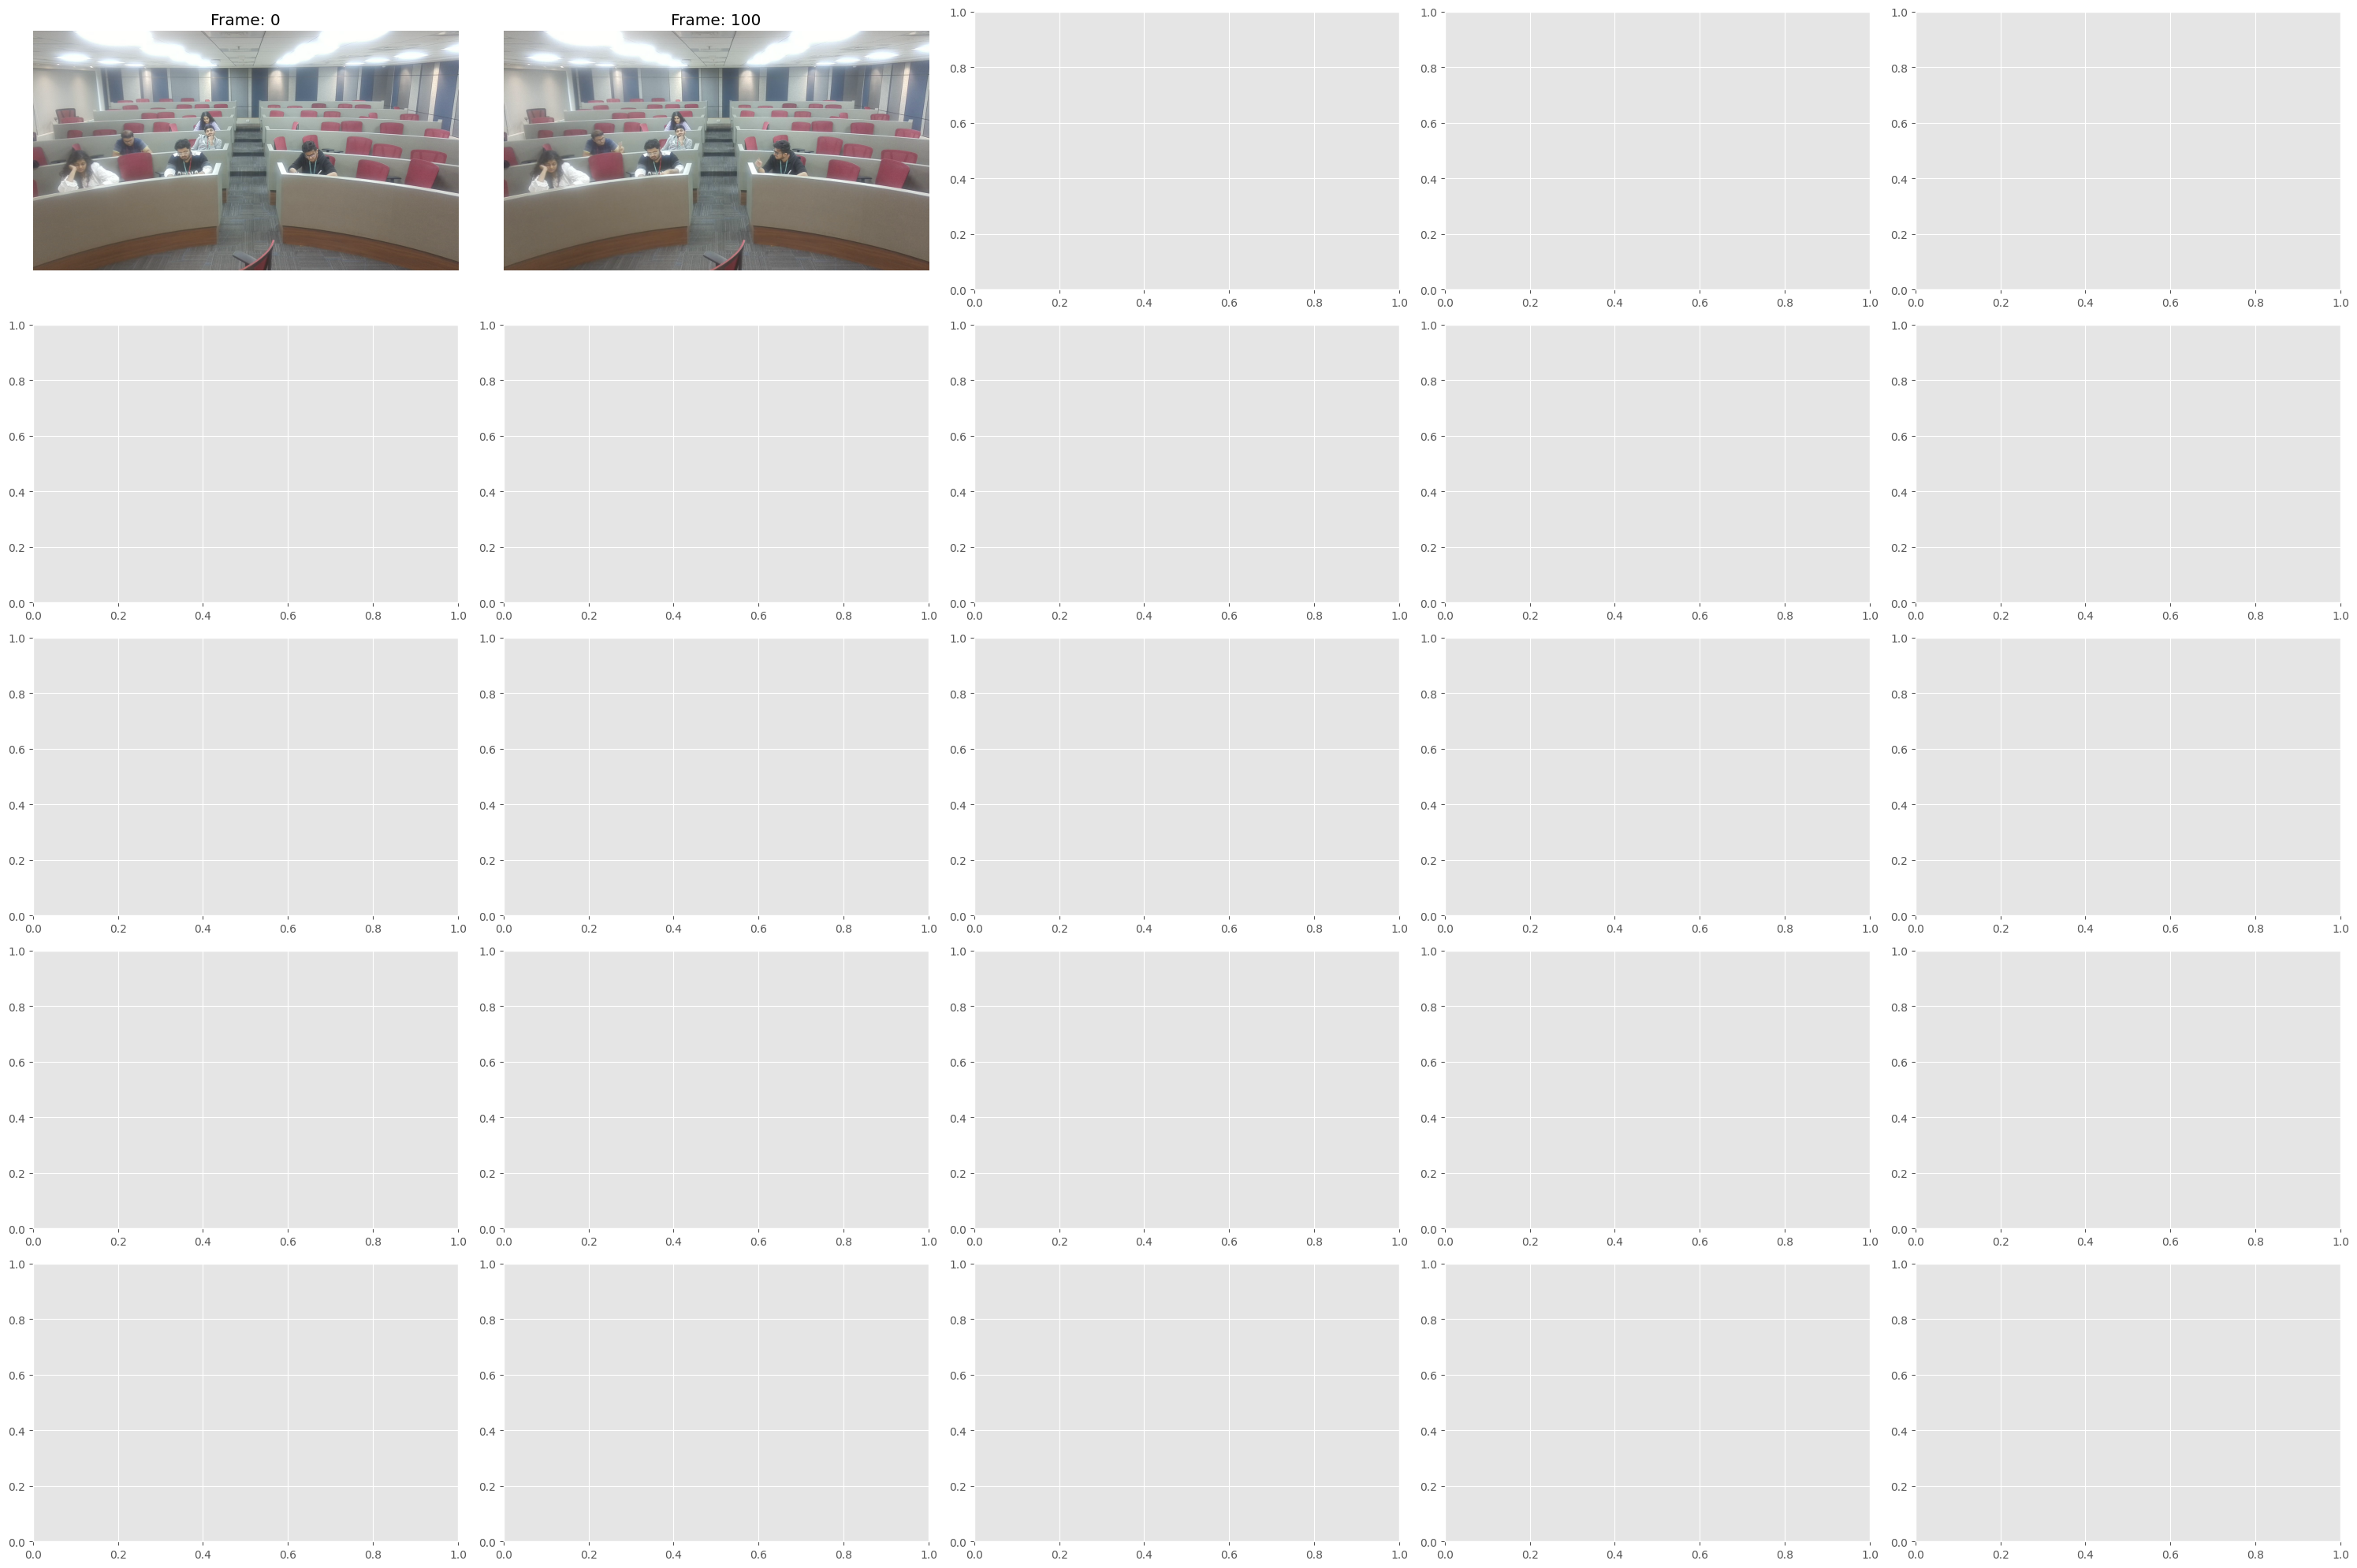

In [23]:
import cv2
import matplotlib.pyplot as plt

fig, axs = plt.subplots(5, 5, figsize=(30, 20))
axs = axs.flatten()


video_path = "/kaggle/input/cheating-detection-offline/WIN_20250118_13_31_59_Pro.mp4"

cap = cv2.VideoCapture(video_path)

n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))


img_idx = 0

for frame in range(n_frames):
    ret, img = cap.read()
    if not ret:  
        break
    if frame % 100 == 0: 
        axs[img_idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[img_idx].set_title(f'Frame: {frame}')
        axs[img_idx].axis('off')
        img_idx += 1
        if img_idx >= len(axs):  
            break

plt.tight_layout()
plt.show()
cap.release()


# **CNN-LSTM**

In [1]:
#CNN-LSTM
import cv2
import numpy as np
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import img_to_array

# Initialize feature extractor (pre-trained CNN)
base_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')

def process_video(video_path, seq_length=30, frame_size=224):
    cap = cv2.VideoCapture(video_path)
    features = []
    frame_count = 0
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break
            
        # Preprocess frame
        frame = cv2.resize(frame, (frame_size, frame_size))
        frame = img_to_array(frame)
        frame = np.expand_dims(frame, axis=0)
        
        # Extract features using pre-trained CNN
        features.append(base_model.predict(frame, verbose=0)[0])
        frame_count += 1
    
    cap.release()
    
    # Convert to sequences
    sequences = []
    for i in range(0, len(features)-seq_length+1, 10):  # 10-frame stride
        sequences.append(features[i:i+seq_length])
    
    return np.array(sequences)


<ipython-input-1-f7d9d0f26f47>:8: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
import os
from sklearn.model_selection import train_test_split

# Directory structure
cheating_dir = "/kaggle/input/cheatvnoncheat/DATA-CHEAT/CHEATING"
non_cheating_dir = "/kaggle/input/cheatvnoncheat/DATA-CHEAT/NONCHEATING"

# Parameters
SEQ_LENGTH = 30 
FEATURES_DIM = 1280 

def load_dataset():
    X, y = [], []
    
    # cheatinggg
    for video_file in os.listdir(cheating_dir):
        sequences = process_video(os.path.join(cheating_dir, video_file), SEQ_LENGTH)
        X.extend(sequences)
        y.extend([1]*len(sequences))
    
     #nonnnn cheatinggg
    for video_file in os.listdir(non_cheating_dir):
        sequences = process_video(os.path.join(non_cheating_dir, video_file), SEQ_LENGTH)
        X.extend(sequences)
        y.extend([0]*len(sequences))
    
    return np.array(X), np.array(y)


X, y = load_dataset()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

print(f"Input shape: {X_train.shape}")#30,1280


Input shape: (357, 30, 1280)


In [4]:
def calculate_optical_flow(prev_frame, next_frame):
    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    next_gray = cv2.cvtColor(next_frame, cv2.COLOR_BGR2GRAY)
    flow = cv2.calcOpticalFlowFarneback(prev_gray, next_gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    return flow


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    brightness_range=[0.9,1.1],
    horizontal_flip=True
)

def augment_sequence(sequence):
    return np.array([aug.random_transform(frame) for frame in sequence])


In [7]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE for temporal data
sampler = SMOTE()
X_resampled, y_resampled = sampler.fit_resample(
    X_train.reshape(X_train.shape[0], -1), 
    y_train
)
X_train = X_resampled.reshape(-1, SEQ_LENGTH, FEATURES_DIM)


In [8]:
pip install tensorflow scikit-learn imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [11]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available: 1


In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(30, 1280)),
    MaxPooling1D(2),
    Conv1D(128, 3, activation='relu'),
    MaxPooling1D(2),
    LSTM(100, return_sequences=True),
    Dropout(0.3),
    LSTM(50),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

callbacks = [
    EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True),
    ModelCheckpoint('best_model.keras', save_best_only=True)
]


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
print(f"X_train shape: {X_train.shape}")  # Should be (num_samples, 30, 1280)
print(f"y_train shape: {y_train.shape}")  # Should be (num_samples,)


X_train shape: (426, 30, 1280)
y_train shape: (357,)


In [14]:
print(f"X_train shape: {X_train.shape}")  # (426, 30, 1280)
print(f"y_train shape: {y_train.shape}")  # (357,)

# Check lengths directly
print(f"Length of X_train: {len(X_train)}")
print(f"Length of y_train: {len(y_train)}")


X_train shape: (426, 30, 1280)
y_train shape: (357,)
Length of X_train: 426
Length of y_train: 357


In [15]:
from sklearn.model_selection import train_test_split

# Fix the splitting so both X_train and y_train have the same length
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Fixed X_train shape: {X_train.shape}")
print(f"Fixed y_train shape: {y_train.shape}")


Fixed X_train shape: (357, 30, 1280)
Fixed y_train shape: (357,)


In [16]:
X_train = X_train[:len(y_train)]  # Keep only the samples that match the label count


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"X_train shape: {X_train.shape}")  
print(f"y_train shape: {y_train.shape}")


history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    class_weight={0: 1, 1: 3},
    callbacks=callbacks
)


X_train shape: (357, 30, 1280)
y_train shape: (357,)
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.6113 - loss: 1.0459 - precision: 0.6113 - recall: 1.0000 - val_accuracy: 0.6250 - val_loss: 0.7580 - val_precision: 0.6250 - val_recall: 1.0000
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5752 - loss: 1.0680 - precision: 0.5752 - recall: 1.0000 - val_accuracy: 0.6250 - val_loss: 0.7507 - val_precision: 0.6250 - val_recall: 1.0000
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5895 - loss: 1.0601 - precision: 0.5895 - recall: 1.0000 - val_accuracy: 0.6250 - val_loss: 0.8009 - val_precision: 0.6250 - val_recall: 1.0000
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5689 - loss: 1.0834 - precision: 0.5689 - recall: 1.0000 - val_accuracy: 0.6250 - val_loss: 0.7442 - val_precision: 0.6250 - val_recall: 1.0000
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5804 - loss: 1.0609 - precision: 0.5804 - recall: 1.000

In [18]:

model = tf.keras.models.load_model('best_model.keras')
results = model.evaluate(X_test, y_test)
print(f'''
Test Metrics:
- Loss: {results[0]:.2f}
- Accuracy: {results[1]:.2%}
- Precision: {results[2]:.2%}
- Recall: {results[3]:.2%}
''')

# Generate predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9833 - loss: 0.1527 - precision: 0.9906 - recall: 0.9815

Test Metrics:
- Loss: 0.17
- Accuracy: 96.67%
- Precision: 98.11%
- Recall: 96.30%

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 298ms/step


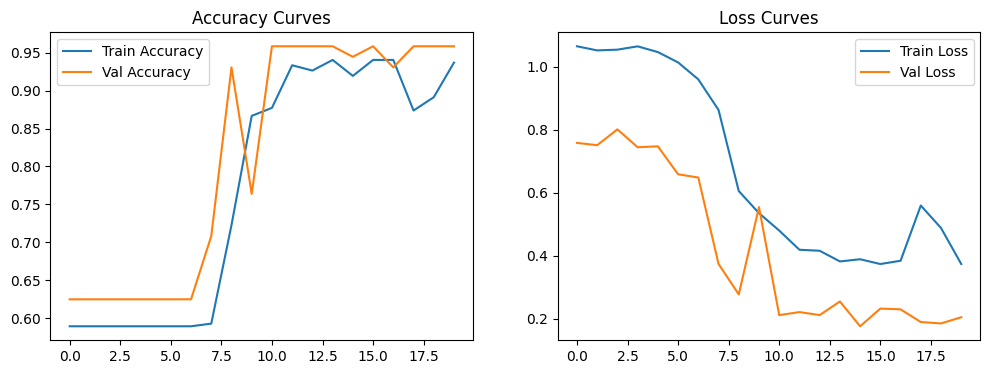

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Curves')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curves')
plt.legend()
plt.show()



Model Evaluation:
Loss: 0.1749
Accuracy: 96.67%
Precision: 98.11%
Recall: 96.30%

Classification Report:
              precision    recall  f1-score   support

Non-Cheating       0.95      0.97      0.96        36
    Cheating       0.98      0.96      0.97        54

    accuracy                           0.97        90
   macro avg       0.96      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90



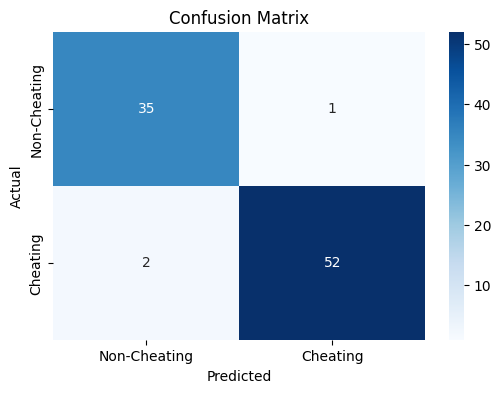

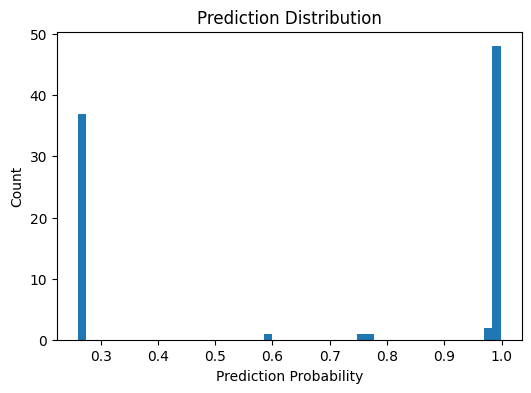

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

def test_model(model_path, X_test, y_test):
    # Load saved model
    model = tf.keras.models.load_model(model_path)
    
    # Evaluate model
    print("\n\033[1mModel Evaluation:\033[0m")
    loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
    print(f"Loss: {loss:.4f}")
    print(f"Accuracy: {accuracy:.2%}")
    print(f"Precision: {precision:.2%}")
    print(f"Recall: {recall:.2%}")
    
    # Generate predictions
    y_pred = (model.predict(X_test, verbose=0) > 0.5).astype("int32")
    
    # Classification report
    print("\n\033[1mClassification Report:\033[0m")
    print(classification_report(y_test, y_pred, target_names=['Non-Cheating', 'Cheating']))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Non-Cheating', 'Cheating'],
                yticklabels=['Non-Cheating', 'Cheating'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Prediction distribution
    plt.figure(figsize=(6,4))
    plt.hist(model.predict(X_test, verbose=0), bins=50)
    plt.xlabel('Prediction Probability')
    plt.ylabel('Count')
    plt.title('Prediction Distribution')
    plt.show()
    
    return y_pred

# Usage
y_pred = test_model('best_model.keras', X_test, y_test)

# Optional: Save predictions
np.save('predictions.npy', y_pred)


<ipython-input-23-eef675f19842>:15: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')



Test Results for video:
Final Decision: CHEATING
Confidence: 45.61%
Raw Probability: 0.7281


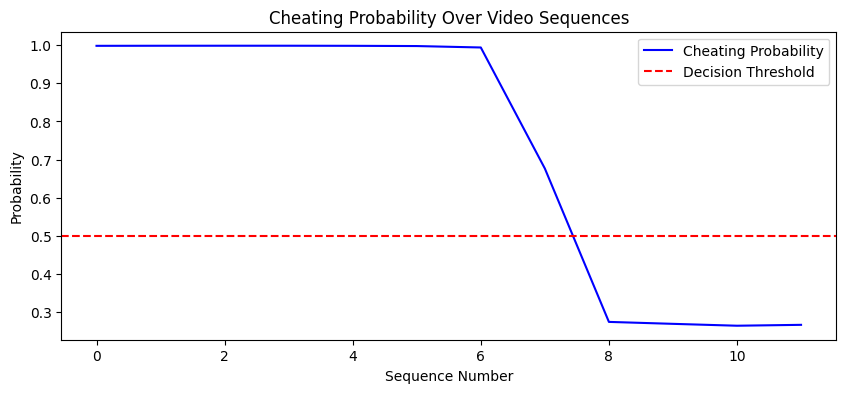

In [23]:
#import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2


model = tf.keras.models.load_model('best_model.keras')

SEQ_LENGTH = 30  
FRAME_SIZE = 224
FEATURES_DIM = 1280  


base_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')

def process_video(video_path):
    """Process video into sequences for model input"""
    cap = cv2.VideoCapture(video_path)
    features = []
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
            
        # Preprocess frame
        frame = cv2.resize(frame, (FRAME_SIZE, FRAME_SIZE))
        frame = tf.keras.applications.mobilenet_v2.preprocess_input(frame)
        feature = base_model.predict(np.expand_dims(frame, axis=0), verbose=0)[0]
        features.append(feature)
    
    cap.release()
    
    sequences = []
    for i in range(0, len(features) - SEQ_LENGTH + 1, 10):  # 10-frame stride
        sequences.append(features[i:i+SEQ_LENGTH])
    
    return np.array(sequences)

def test_video(video_path, model):
    # Process video
    sequences = process_video(video_path)
    
    if len(sequences) == 0:
        return {"error": "Video too short or processing failed"}
    
    # Make predictions
    predictions = model.predict(sequences, verbose=0)
    avg_prediction = np.mean(predictions)
    
    return {
        "cheating_probability": float(avg_prediction),
        "decision": "CHEATING" if avg_prediction > 0.5 else "NON-CHEATING",
        "confidence": float(np.abs(avg_prediction - 0.5) * 2),  # Convert to 0-1 confidence
        "sequence_predictions": predictions.tolist()
    }

results = test_video('/kaggle/input/newewe/video.mp4', model)

print(f"\nTest Results for video:")
print(f"Final Decision: {results['decision']}")
print(f"Confidence: {results['confidence']:.2%}")
print(f"Raw Probability: {results['cheating_probability']:.4f}")


if 'sequence_predictions' in results:
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 4))
    plt.plot(results['sequence_predictions'], 'b-', label='Cheating Probability')
    plt.axhline(0.5, color='red', linestyle='--', label='Decision Threshold')
    plt.xlabel('Sequence Number')
    plt.ylabel('Probability')
    plt.title('Cheating Probability Over Video Sequences')
    plt.legend()
    plt.show()


<ipython-input-24-f6fc76b5847d>:15: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')



Test Results for video:
Final Decision: NON-CHEATING
Confidence: 47.66%
Raw Probability: 0.2617


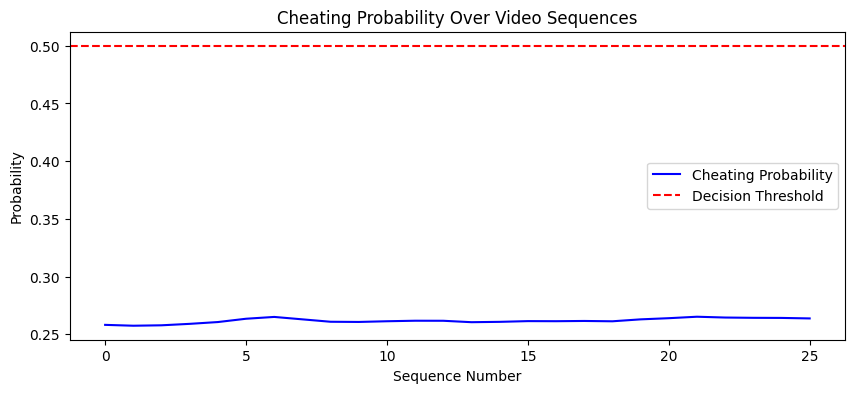

In [24]:
#import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2


model = tf.keras.models.load_model('best_model.keras')

# Parameters 
SEQ_LENGTH = 30  
FRAME_SIZE = 224
FEATURES_DIM = 1280  # MobileNetV2 dim

# Initialize feature extractor
base_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')

def process_video(video_path):
    """Process video into sequences for model input"""
    cap = cv2.VideoCapture(video_path)
    features = []
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
            
        # Preprocess frame
        frame = cv2.resize(frame, (FRAME_SIZE, FRAME_SIZE))
        frame = tf.keras.applications.mobilenet_v2.preprocess_input(frame)
        feature = base_model.predict(np.expand_dims(frame, axis=0), verbose=0)[0]
        features.append(feature)
    
    cap.release()
    
    # Create sequences with sliding window
    sequences = []
    for i in range(0, len(features) - SEQ_LENGTH + 1, 10):  # 10-frame stride
        sequences.append(features[i:i+SEQ_LENGTH])
    
    return np.array(sequences)

def test_video(video_path, model):
    # Process video
    sequences = process_video(video_path)
    
    if len(sequences) == 0:
        return {"error": "Video too short or processing failed"}
    
    # Make predictions
    predictions = model.predict(sequences, verbose=0)
    avg_prediction = np.mean(predictions)
    
    return {
        "cheating_probability": float(avg_prediction),
        "decision": "CHEATING" if avg_prediction > 0.5 else "NON-CHEATING",
        "confidence": float(np.abs(avg_prediction - 0.5) * 2),  # Convert to 0-1 confidence
        "sequence_predictions": predictions.tolist()
    }

# Test your video
results = test_video('/kaggle/input/newoks/cheating.mp4', model)

# Print results
print(f"\nTest Results for video:")
print(f"Final Decision: {results['decision']}")
print(f"Confidence: {results['confidence']:.2%}")
print(f"Raw Probability: {results['cheating_probability']:.4f}")

# Optional: Plot prediction timeline
if 'sequence_predictions' in results:
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 4))
    plt.plot(results['sequence_predictions'], 'b-', label='Cheating Probability')
    plt.axhline(0.5, color='red', linestyle='--', label='Decision Threshold')
    plt.xlabel('Sequence Number')
    plt.ylabel('Probability')
    plt.title('Cheating Probability Over Video Sequences')
    plt.legend()
    plt.show()


<ipython-input-25-3b41c4f3fd20>:15: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')



Test Results for video:
Final Decision: CHEATING
Confidence: 95.73%
Raw Probability: 0.9787


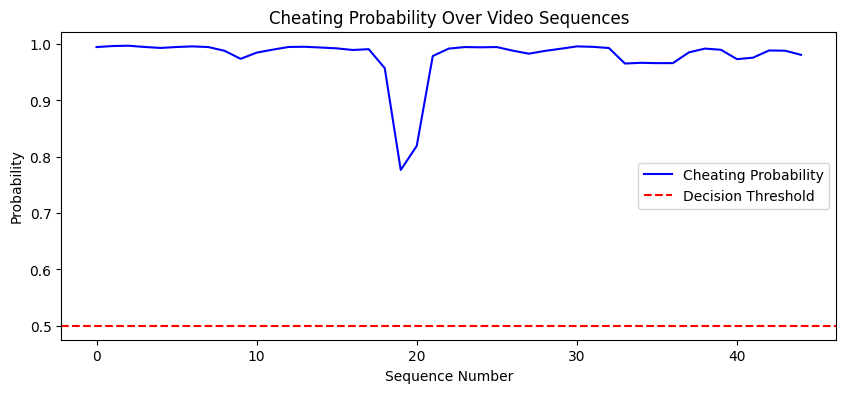

In [25]:

#import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2

model = tf.keras.models.load_model('best_model.keras')


SEQ_LENGTH = 30  
FRAME_SIZE = 224
FEATURES_DIM = 1280  

base_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')

def process_video(video_path):
    """Process video into sequences for model input"""
    cap = cv2.VideoCapture(video_path)
    features = []
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
            
        frame = cv2.resize(frame, (FRAME_SIZE, FRAME_SIZE))
        frame = tf.keras.applications.mobilenet_v2.preprocess_input(frame)
        feature = base_model.predict(np.expand_dims(frame, axis=0), verbose=0)[0]
        features.append(feature)
    
    cap.release()
    
    sequences = []
    for i in range(0, len(features) - SEQ_LENGTH + 1, 10):  # 10-frame stride
        sequences.append(features[i:i+SEQ_LENGTH])
    
    return np.array(sequences)

def test_video(video_path, model):
    sequences = process_video(video_path)
    
    if len(sequences) == 0:
        return {"error": "Video too short or processing failed"}
    
    predictions = model.predict(sequences, verbose=0)
    avg_prediction = np.mean(predictions)
    
    return {
        "cheating_probability": float(avg_prediction),
        "decision": "CHEATING" if avg_prediction > 0.5 else "NON-CHEATING",
        "confidence": float(np.abs(avg_prediction - 0.5) * 2),  # Convert to 0-1 confidence
        "sequence_predictions": predictions.tolist()
    }


results = test_video('/kaggle/input/cheating-detection-offline/WIN_20250118_13_21_54_Pro.mp4', model)


print(f"\nTest Results for video:")
print(f"Final Decision: {results['decision']}")
print(f"Confidence: {results['confidence']:.2%}")
print(f"Raw Probability: {results['cheating_probability']:.4f}")

if 'sequence_predictions' in results:
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 4))
    plt.plot(results['sequence_predictions'], 'b-', label='Cheating Probability')
    plt.axhline(0.5, color='red', linestyle='--', label='Decision Threshold')
    plt.xlabel('Sequence Number')
    plt.ylabel('Probability')
    plt.title('Cheating Probability Over Video Sequences')
    plt.legend()
    plt.show()
